# CUSTOMER CHURN PREDICTION 

#### DETAILS
##### NAME   :MRECW
##### TOPIC  : CUSTOMER CHURN PREDICTION


In [5]:
# IMPORTING THE LIBRARIES
# GENERAL LIBRARIES FOR DATASET
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import math
# FOR ID3 DECISION TREE
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from numpy import log2 as log
# FOR SVM
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
# FOR ANN
from sklearn.neural_network import MLPClassifier
# FOR THE STATISTICS IN EACH MODEL
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### READING AND CLEANING THE DATASET

In [6]:
# READING THE DATASET
path = 'C:/data/data.csv' # Enter your path to the dataset
df = pd.read_csv(path, encoding = 'latin1')
df2 = pd.read_csv(path, encoding = 'latin1')

In [7]:
# CLEANING UP THE DATA
def clean(df):
    df = df.dropna()
    df = df.astype({'CustomerID':'int'})
    df = df[df['CustomerID'] > 0]
    df = df[df['StockCode'] != 'POST']
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M',infer_datetime_format=True)
    return df

df = clean(df)
df2 = clean(df2)
mask1 = (df['InvoiceDate'] >= '01-12-2010') & (df['InvoiceDate'] <= '31-08-2011')
df_1 = df.loc[mask1]
mask2 = (df2['InvoiceDate'] >= '01-09-2011') & (df2['InvoiceDate'] <= '31-12-2011') & (df2['Quantity'] > 0)
df_2 = df2.loc[mask2]

# DISPLAYING THE 2 DATASETS
display("DF1",df_1) # First range of dates
display("DF2",df_2) # Second range of dates

'DF1'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
319395,564852,82552,WASHROOM METAL SIGN,10,2011-08-30 17:23:00,1.45,14976,United Kingdom
319396,564852,21756,BATH BUILDING BLOCK WORD,3,2011-08-30 17:23:00,5.95,14976,United Kingdom
319397,564852,21908,CHOCOLATE THIS WAY METAL SIGN,7,2011-08-30 17:23:00,2.10,14976,United Kingdom
319398,564852,22116,METAL SIGN HIS DINNER IS SERVED,10,2011-08-30 17:23:00,0.79,14976,United Kingdom


'DF2'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
49034,540498,21485,RETROSPOT HEART HOT WATER BOTTLE,1,2011-01-09 10:06:00,4.95,17243,United Kingdom
49035,540498,22112,CHOCOLATE HOT WATER BOTTLE,1,2011-01-09 10:06:00,4.95,17243,United Kingdom
49036,540498,17091A,LAVENDER INCENSE IN TIN,6,2011-01-09 10:06:00,1.25,17243,United Kingdom
49037,540498,84813,SET OF 4 DIAMOND NAPKIN RINGS,6,2011-01-09 10:06:00,12.75,17243,United Kingdom
49038,540498,22795,SWEETHEART RECIPE BOOK STAND,3,2011-01-09 10:06:00,6.75,17243,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


### CREATING THE TARGET VARIABLE

In [8]:
# MARKING CHURN AND NON-CHURN CUSTOMERS
df_1['Churn'] = np.in1d(df_1['CustomerID'], df_2['CustomerID'])
df_1['Churn'] = df_1['Churn'].map({True: 'Not Churn', False: 'Churn'})

#### DISPLAYING THE TRAINING SET

In [9]:
# DISPLAYING DATA| OF "CHURN" CUSTOMERS
df_3 = df_1[df_1["Churn"] == "Churn"]
display("ONLY CHURN", df_3)

'ONLY CHURN'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Churn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Churn
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Churn
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Churn
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Churn
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Churn
...,...,...,...,...,...,...,...,...,...
268027,C560372,M,Manual,-1,2011-07-18 12:26:00,4287.63,17448,United Kingdom,Churn
268431,C560420,M,Manual,-1,2011-07-18 15:11:00,1592.49,15369,United Kingdom,Churn
268476,C560430,M,Manual,-1,2011-07-18 15:21:00,611.86,13154,United Kingdom,Churn
270557,C560572,M,Manual,-1,2011-07-19 14:45:00,112.35,17065,United Kingdom,Churn


### CUSTOMER LEVEL FEATURE SELECTION

#### FEATURE 1 : DISPLAYING ONLY PRODUCT NAMES

In [10]:
def get_product_name(x):
    max_upper_count = 0
    product_name = ''
    for i in x:
        if(i == i):  #To Check for NaN
            count = 0
            for letter in i:
                if(letter.isupper()):
                    count = count+1
            if count>max_upper_count:
                max_upper_count = count
                product_name = i
    return product_name
grouped = df_3.groupby("StockCode")['Description'].unique()
lookup = grouped.apply(get_product_name)
display(lookup)

StockCode
10002                 INFLATABLE POLITICAL GLOBE 
10120                                DOGGY RUBBER
10123C                      HEARTS WRAPPING TAPE 
10125                     MINI FUNKY DESIGN TAPES
10135                COLOURING PENCILS BROWN TUBE
                              ...                
90210B               CLEAR ACRYLIC FACETED BANGLE
90211B          JET BLACK LAS VEGAS NECKLACE 45CM
BANK CHARGES                         Bank Charges
C2                                       CARRIAGE
M                                          Manual
Name: Description, Length: 1312, dtype: object

#### FEATURE 2 : COUNTRY CODE

In [11]:
# COUNTRY CODE INSTEAD OF COUNTRY NAMES
countries_dict = {}

countries = df_3['Country'].unique()
for i,y in enumerate(countries):
    countries_dict[y] = i

df_3['Country'] = [countries_dict[x] for x in df_3['Country']]
df_3['Country'].unique()
df_3.head()
display(df_3.count())

InvoiceNo      3261
StockCode      3261
Description    3261
Quantity       3261
InvoiceDate    3261
UnitPrice      3261
CustomerID     3261
Country        3261
Churn          3261
dtype: int64

#### FEATURE 3 : USING STOCKCODE

In [12]:
print("STOCK CODE LENGTH : ",len(df_3['StockCode'].unique()))

STOCK CODE LENGTH :  1312


#### FEATURE 4 : STATISTICS FEATURE

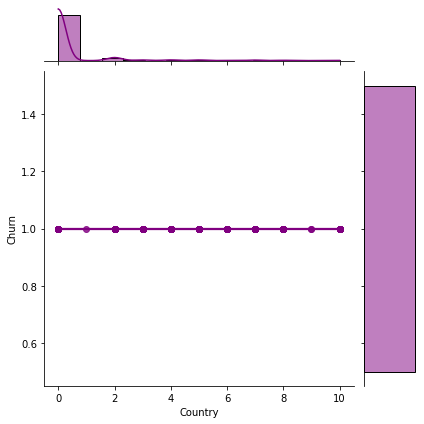

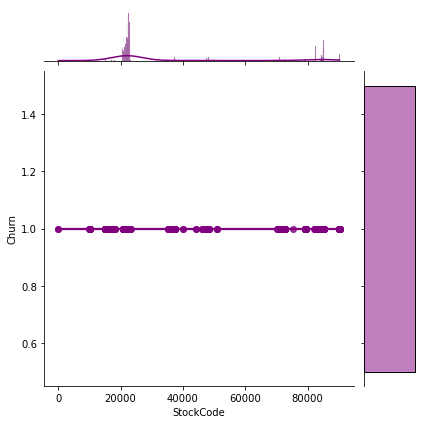

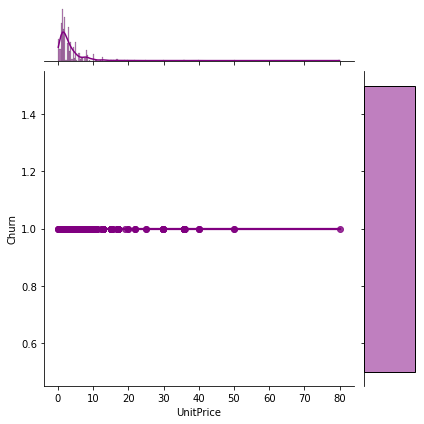

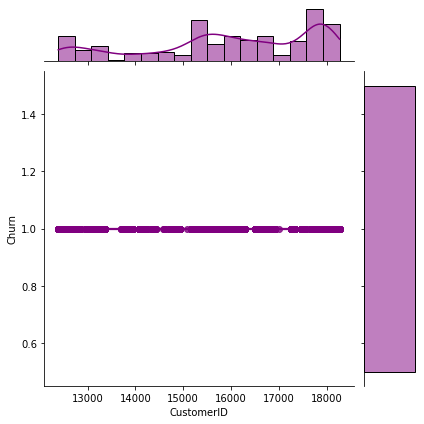

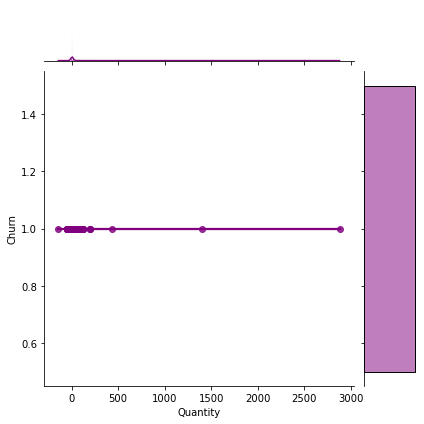

In [13]:
# DATA MODIFICATION FOR PLOT
df_3_3 = df_3.copy()
df_3_3['Churn'] = df_3_3['Churn'].map({"Churn": 1, "Not Churn": 0})
df_3_3['StockCode'] = df_3_3['StockCode'].str.replace('\D', '')
df_3_3 = df_3_3[df_3_3['StockCode']!='']
df_3_3['StockCode'] = df_3_3['StockCode'].astype(int)

# PLOTTING THE DATA
sns.jointplot(data = df_3_3, x = 'Country', y = 'Churn', kind = 'reg', color = 'purple')
sns.jointplot(data = df_3_3, x = 'StockCode', y = 'Churn', kind = 'reg', color = 'purple')
sns.jointplot(data = df_3_3, x = 'UnitPrice', y = 'Churn', kind = 'reg', color = 'purple')
sns.jointplot(data = df_3_3, x = 'CustomerID', y = 'Churn', kind = 'reg', color = 'purple')
sns.jointplot(data = df_3_3, x = 'Quantity', y = 'Churn', kind = 'reg', color = 'purple')

<AxesSubplot:>

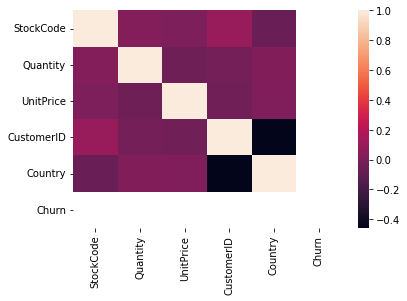

In [14]:
sns.heatmap(df_3_3.corr())

### CONSTRUCT A DECISION TREE USING ID3

In [ ]:
# Construct a Decision Tree using ID3 algorithm and classify whether the customer will Churn/Not Churn
eps = np.finfo(float).eps
def find_entropy(df):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction * np.log2(fraction)
    return entropy
  
  
def find_entropy_attribute(df,attribute):
  Class = df.keys()[-1]   #To make the code generic, changing target variable class name
  target_variables = df[Class].unique()  #This gives all 'Yes' and 'No'
  variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute] == variable][df[Class] == target_variable])
          den = len(df[attribute][df[attribute] == variable])
          fraction = num/(den+eps)
          entropy += -fraction * log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2 * entropy
  return abs(entropy2)


def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
        IG.append(find_entropy(df) - find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]
  
  
def get_subtable(df, node, value):
  return df[df[node] == value].reset_index(drop = True)


def buildTree(df,tree = None): 
    Class = df.keys()[-1] # To make the code generic, changing target variable class name
    # Here we build our decision tree
    # Get attribute with maximum information gain
    node = find_winner(df)
    
    # Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])
    
    # Create an empty dictionary to create tree    
    if tree is None:                    
        tree = {}
        tree[node] = {}
    
    # We make loop to construct a tree by calling this function recursively. 
    # In this we check if the subset is pure and stops if it is pure. 

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['Churn'],return_counts = True)                        
        
        if len(counts) == 1: #Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree

t = buildTree(df_1)

In [ ]:
print("The DECISION TREE in \'Dictionary\' Format :\n")
display(t)

#### PLOTTING THE ID3 DECISION TREE

In [ ]:
x = df_1[['Quantity','UnitPrice']]
y = df_1['Churn']
x_train, x_test, y_train, y_test = train_test_split(x,y)

#### 80/20 SPLIT

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

In [ ]:
%matplotlib inline

clf = DecisionTreeClassifier(max_depth = 4000)
fig = clf.fit(x_train, y_train)
plt.figure(figsize = (20,15))
tree.plot_tree(fig, filled = True)
plt.show()

In [ ]:
# MAGNIFIED VIEW

%matplotlib inline

clf = DecisionTreeClassifier(max_depth = 3)
fig = clf.fit(x_train, y_train)
plt.figure(figsize = (20,15))
tree.plot_tree(fig, filled = True)
plt.show()

#### ACCURACY AND CLASSIFICATION REPORT

In [ ]:
# ACCURACY OF ID3 DT

y_pred = clf.predict(x_test)
print("Accuracy % :", metrics.accuracy_score(y_test, y_pred) * 100)

In [ ]:
# CLASSIFICATION REPORT OF ID3 DT
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_pred))

### ROC : AUC AND CURVE IN ID3

In [ ]:
def ROC_Curve(y_test, y_pred):
    yt1 = y_test.map({"Churn": 1,"Not Churn": 0})
    yp1 = np.where(y_test == "Churn", 1, 0)
    # ROC AUC
    auc = roc_auc_score(yt1, yp1)
    print('ROC AUC: %f' % auc)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(yt1, yp1)
    font1 = {'family':'serif','color':'blue','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.plot(fpr, tpr, marker = '.')
    plt.title("ROC CURVE", fontdict = font1)
    plt.xlabel("PREDICTION", fontdict = font2)
    plt.ylabel("TESTING", fontdict = font2)
    plt.show()
ROC_Curve(y_test, y_pred)

### SVM 

In [ ]:
#SVM
clf2 = LinearSVC(max_iter = 5000,verbose = True)
clf2.fit(x_train, y_train)
method = SVC(gamma = 'auto', kernel = 'rbf', C = 3.753) # SVC classifier passed to the Pipeline function.
clf2_2 = Pipeline([('scaler', StandardScaler()), ('svc', method)]) #Used as an estimator and avoid leaking the test set into the train set.
clf2_2.fit(x_train, y_train) # To fit the model obtained.
y_pred = clf2.predict(x_test)

#### ACCURACY AND CLASSIFICATION REPORT OF SVM

In [ ]:
# CLASSIFICATION REPORT OF SVM
print("LINEAR SVM:\n")
print("Accuracy % :", metrics.accuracy_score(y_test, y_pred) * 100)
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_pred))
print("RBF SVM:\n")
print(clf2_2.score(x_test, y_test) * 100)

### ROC : AUC AND CURVE IN SVM

In [ ]:
ROC_Curve(y_test, y_pred)

### ANN

In [ ]:
#ANN
clf3 = MLPClassifier(max_iter = 5000, verbose = True)
clf3 = clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)

#### ACCURACY AND CLASSIFICATION REPORT OF ANN

In [ ]:
# CLASSIFICATION REPORT OF ANN
print("Accuracy % :", metrics.accuracy_score(y_test, y_pred) * 100)
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, y_pred))
print("CLASSIFICATION REPORT:\n", classification_report(y_test, y_pred))

### ROC : AUC AND CURVE IN ANN

In [ ]:
ROC_Curve(y_test, y_pred)

##### NOTE : All ```Evaluations``` and ```Comparative study``` for ID3, ANN and SVM are shown after their respective evaluations.